# 1. Introduction

### 1.1 Background 

Toronto is the capital of Ontario and is the most populous city in Canada with a population of 2,731,571 in 2016. It is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. The cuisine of Toronto reflects the multicultural diversity of the city by being the host to restaurants belonging to various cuisines from all over the world like Chinese, Vietnamese, Korean, Indian, Italian etc. There are neighborhoods where the dominant cuisine is based on the demographics of the people living there. Certain neighborhoods are famous for certain types of cuisines. For example, Chinatown is famous for Chinese cuisine, Koreatown is famous for korean cuisine and so on.

### 1.2 Problem

According to Yelp, a recommendation app, there are around 15,822 restaurants and 103 neighborhoods in Toronto. Therefore, tourists who are new to Toronto need help in deciding what neighborhood to visit in order to try the cuisine it is famous for. Tourist guides find it helpful if they know what neighborhoods are popular for specific cuisines so that they can recommend them to the tourists.

### 1.3 Interested audience

Tourists to Toronto would be interested in finding the neighborhoods in which their favorite cuisine is famous. Tourist guides find it helpful in recommending those neighborhoods based on the interests of their clients. Entrepreneurs can find what the dominant cuisine of a neighborhood is in order to decide if they want to establish restaurant of a different cusine to avoid competition, or choose a different neighborhood. 

# 2. Data acquisition and cleaning

### 2.1 Data Sources

Data about the boroughs, neighborhoods and postal codes in Toronto taken from [this](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wikipedia table. The coordinates of each neighborhood according to its postal code is given in [this](https://github.com/kamis1r/Coursera_Capstone/blob/master/Geospatial_Coordinates.csv) table. There are 11 boroughs and 103 neighborhoods in total. 

Details of restaurants can be obtained by refining location data given by Foursquare API. To do this, firstly, a search request is made to tabulate all venues in a particular neighborhood. The venue ID from the table is then used to make a request to obtain details of the venue like the menu, price, rating, category and "likes". Since we are clustering neighborhoods based on the most liked category of restaurants, we are only interested in the "category" and "likes" fields of the data. 


### 2.2 Data Cleaning

Rows where boroughs are not assigned are dropped. If a row has a borough and a postal code, but has no neighborhood, the borough is assigned as the neighborhood. The data in the geospatial coordinates table did not need any cleaning. Venue details obtained from Foursquare are filtered to get only the venue ID, venue neighborhood, venue category and number of "likes" the venue has. 

In [55]:
#Setting the Environment and importing required libraries

import json # library to handle JSON files

from geopy.geocoders import Nominatim # library to convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import pandas as pd # library to handle data in DataFrame
import numpy as np # library to handle data in a vectorized manner
import folium # library to render maps

#to extract table from wikipedia
from pandas.io.html import read_html

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('Libraries imported.')

Libraries imported.


In [56]:
page = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
table = read_html(page,attrs={"class":"wikitable"})
df = table[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [57]:
#drop rows where borough is not assigned

df = df[df.Borough!= "Not assigned"]
df = df.reset_index(drop=True)

In [58]:
#Grouping DataFrame by Post Code and Borough and renaming columns

df = df.groupby(['Postcode', 'Borough'], sort = False).agg(', '.join).reset_index()
df.rename(columns={'Postcode':'Postal Code'}, inplace=True)
df.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Not assigned
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [59]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [60]:
#Read Geospatial_Coordinates.csv to get coordinates of Neighborhood

coordinates = pd.read_csv('https://raw.githubusercontent.com/kamis1r/Coursera_Capstone/master/Geospatial_Coordinates.csv')
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [61]:
#rename postal code to postcode

df = pd.merge(df, coordinates, on = 'Postal Code')

df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Not assigned,43.662301,-79.389494


In [62]:
#Find coordinates of Toronto to mark it on a folium map

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [63]:
# create map of Toronto using the latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, PostalCode in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Postal Code']):
    label = '{}, {}'.format(PostalCode, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

### We want to segment and cluster only the neighborhoods in Toronto, so we slice the original dataframe and create a new dataframe  which contains Boroughs that have the word, 'Toronto' in them

In [64]:
dfToronto = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)
dfToronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [65]:
print('The new dataframe has {} boroughs and {} neighborhoods.'.format(
        len(dfToronto['Borough'].unique()),
        dfToronto.shape[0]
    )
)

The new dataframe has 4 boroughs and 38 neighborhoods.


### Now let us visualize the boroughs that only contain the word Toronto.

In [66]:
# create map of Toronto using latitude and longitude values
map_toronto2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(dfToronto['Latitude'], dfToronto['Longitude'], dfToronto['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto2)  
    
map_toronto2

Now we shall use foursquare API to obtain location data to explore the neighborhoods.

In [67]:
CLIENT_ID = 'HIIB2ROI3MBLUPCKGN4UGTMKWWMIMOHWFZ3HVNL1DNBXVQH5' # your Foursquare ID
CLIENT_SECRET = 'G0XX5KUXX0WGXUDGUEZPEXJOHXLGVHP42UT0FBELNUREGO2C' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HIIB2ROI3MBLUPCKGN4UGTMKWWMIMOHWFZ3HVNL1DNBXVQH5
CLIENT_SECRET:G0XX5KUXX0WGXUDGUEZPEXJOHXLGVHP42UT0FBELNUREGO2C


### we define a method to get nearby venues from a neighborhood's latitude and longitudinal values using Foursquare API

In [68]:
def getNearbyVenues(names, latitudes, longitudes, radius=700,LIMIT = 150, section = 'food'):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            section)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Only add venues that are of category "x restaurant"
        for v in results:
            
            if (" Restaurant" in v['venue']['categories'][0]['name']):
                venues_list.append([(
                                v['venue']['id'],
                                name, 
                                lat, 
                                lng, 
                                v['venue']['name'], 
                                v['venue']['location']['lat'], 
                                v['venue']['location']['lng'],  
                                v['venue']['categories'][0]['name'])]) 
            

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['id','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Restaurant', 
                  'Restaurant Latitude', 
                  'Restaurant Longitude', 
                  'Restaurant Category']
    
    return(nearby_venues)

In [69]:
toronto_venues = getNearbyVenues(names=dfToronto['Neighborhood'],
                                   latitudes=dfToronto['Latitude'],
                                   longitudes=dfToronto['Longitude']
                                  )

Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

In [70]:
print(toronto_venues.shape)
toronto_venues.head()

(911, 8)


,id,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Category
0,57e0745a498ea809dbf75f68,"Harbourfront, Regent Park",43.65426,-79.360636,Souk Tabule,43.653756,-79.354390,Mediterranean Restaurant
1,53a22c92498ec91fda7ce133,"Harbourfront, Regent Park",43.65426,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
2,4ad776eef964a520e20a21e3,"Harbourfront, Regent Park",43.65426,-79.360636,Mangia and Bevi Resto-Bar,43.652250,-79.366355,Italian Restaurant
3,51ddecee498e1ffd34185d2f,"Harbourfront, Regent Park",43.65426,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
4,5542ab36498e2f92a8c248f2,"Harbourfront, Regent Park",43.65426,-79.360636,Cocina Economica,43.654959,-79.365657,Mexican Restaurant


Number of venues in each neighborhood

In [71]:
toronto_venues.groupby('Neighborhood').count()

,id,Neighborhood Latitude,Neighborhood Longitude,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Category
Neighborhood,,,,,,,
"Adelaide, King, Richmond",47,47,47,47,47,47,47
Berczy Park,45,45,45,45,45,45,45
"Brockton, Exhibition Place, Parkdale Village",19,19,19,19,19,19,19
Business Reply Mail Processing Centre 969 Eastern,8,8,8,8,8,8,8
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",2,2,2,2,2,2,2
"Cabbagetown, St. James Town",20,20,20,20,20,20,20
Central Bay Street,49,49,49,49,49,49,49
"Chinatown, Grange Park, Kensington Market",61,61,61,61,61,61,61
Christie,2,2,2,2,2,2,2


In [72]:
pc1 = toronto_venues.groupby('Neighborhood').count()

pc1.sort_values(by='Restaurant', ascending=False, inplace = True)
pc1 = pc1["Restaurant"]

In [73]:
pc1.describe()

count    38.000000
mean     23.973684
std      17.849955
min       1.000000
25%       8.000000
50%      19.500000
75%      41.750000
max      61.000000
Name: Restaurant, dtype: float64

Let us look at the composition of cuisines in Toronto

In [74]:
pc2 = toronto_venues.groupby('Restaurant Category').count()
pc2.sort_values(by='Restaurant', ascending=False, inplace = True)
pc2 = pc2["Restaurant"]


In [75]:
pc2 = pc2.head(20)

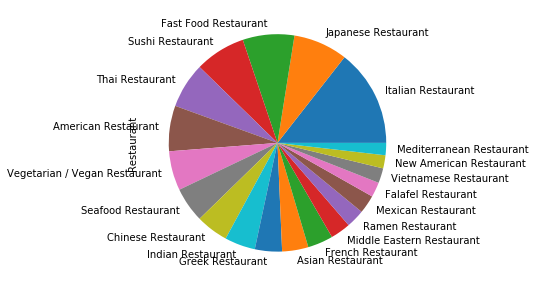

In [76]:
#Pie chart representing the distribution of cusines in Toronto.


pc2.plot.pie(y='Restaurant', figsize=(5, 5))


Let's find out how many unique category of restaurants are there in Toronto

In [77]:

print('There are {} uniques categories.'.format(len(toronto_venues['Restaurant Category'].unique())))

There are 63 uniques categories.


### Analyzing each neighborhood

In [78]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Restaurant Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(10)

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Pakistani Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Harbourfront, Regent Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Grouping rows by neighborhoods and taking the mean of the frequency of the restaurants in each category

In [79]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Pakistani Restaurant,Persian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Seafood Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Adelaide, King, Richmond",0.000000,0.085106,0.000000,0.063830,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.042553,0.000000,0.021277,0.000000,0.021277,0.021277,0.0000,0.000000,0.000000,0.0000,0.021277,0.106383,0.127660,0.000000,0.000000,0.021277,0.000000,0.021277,0.021277,0.000000,0.021277,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.021277,0.085106,0.0000,0.000000,0.000000,0.000000,0.063830,0.000000,0.000000,0.063830,0.000000,0.0000,0.000000,0.085106,0.000000
1,Berczy Park,0.000000,0.044444,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.000000,0.000000,0.044444,0.000000,0.022222,0.000000,0.0,0.000000,0.000000,0.022222,0.000000,0.000000,0.133333,0.000000,0.044444,0.000000,0.022222,0.022222,0.0000,0.000000,0.000000,0.0000,0.022222,0.177778,0.044444,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.022222,0.044444,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.088889,0.0000,0.000000,0.000000,0.000000,0.088889,0.000000,0.022222,0.022222,0.000000,0.0000,0.000000,0.044444,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.052632,0.105263,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.0000,0.052632,0.000000,0.0000,0.000000,0.052632,0.157895,0.000000,0.105263,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.105263,0.052632
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.125000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.000000

## Let's print the top 5 cuisines in each neighborhood

In [80]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Restaurant','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                      Restaurant  freq
0            Japanese Restaurant  0.13
1             Italian Restaurant  0.11
2  Vegetarian / Vegan Restaurant  0.09
3             Seafood Restaurant  0.09
4            American Restaurant  0.09


----Berczy Park----
                      Restaurant  freq
0             Italian Restaurant  0.18
1           Fast Food Restaurant  0.13
2               Sushi Restaurant  0.09
3             Seafood Restaurant  0.09
4  Vegetarian / Vegan Restaurant  0.04


----Brockton, Exhibition Place, Parkdale Village----
                      Restaurant  freq
0            Japanese Restaurant  0.16
1  Vegetarian / Vegan Restaurant  0.11
2              Korean Restaurant  0.11
3             Falafel Restaurant  0.11
4             Italian Restaurant  0.05


----Business Reply Mail Processing Centre 969 Eastern----
             Restaurant  freq
0  Fast Food Restaurant  0.62
1    Italian Restaurant  0.12
2      Sushi Restaurant  0.12
3    Fal

             Restaurant  freq
0      Greek Restaurant  0.39
1    Italian Restaurant  0.10
2  Fast Food Restaurant  0.10
3      Sushi Restaurant  0.07
4  Caribbean Restaurant  0.05




In [81]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [82]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Cuisine'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Cuisine'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
0,"Adelaide, King, Richmond",Japanese Restaurant,Italian Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Asian Restaurant,Thai Restaurant
1,Berczy Park,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Seafood Restaurant,Chinese Restaurant,American Restaurant,French Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Japanese Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Vietnamese Restaurant,Seafood Restaurant,Asian Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Fast Food Restaurant,Italian Restaurant,Sushi Restaurant,Falafel Restaurant,Doner Restaurant,Hotpot Restaurant,Hawaiian Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",American Restaurant,Tapas Restaurant,Vietnamese Restaurant,French Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant


# Cluster Neighborhoods

In [83]:
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 6, 0, 1, 1, 1, 3, 1])

In [84]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = dfToronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
0,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,Thai Restaurant,Italian Restaurant,Mexican Restaurant,Mediterranean Restaurant,French Restaurant,Chinese Restaurant,Falafel Restaurant
1,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1,Chinese Restaurant,Fast Food Restaurant,Ramen Restaurant,Sushi Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Italian Restaurant
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Italian Restaurant,Seafood Restaurant,American Restaurant,Japanese Restaurant,Fast Food Restaurant,Asian Restaurant,Thai Restaurant
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Asian Restaurant,Thai Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Greek Restaurant,French Restaurant
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Seafood Restaurant,Chinese Restaurant,American Restaurant,French Restaurant


In [85]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

Cluster 0: 

In [86]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
31,"CN Tower, Bathurst Quay, Island airport, Harbo...",0,American Restaurant,Tapas Restaurant,Vietnamese Restaurant,French Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant


Cluster 1:

In [87]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
0,"Harbourfront, Regent Park",1,Thai Restaurant,Italian Restaurant,Mexican Restaurant,Mediterranean Restaurant,French Restaurant,Chinese Restaurant,Falafel Restaurant
1,"Ryerson, Garden District",1,Chinese Restaurant,Fast Food Restaurant,Ramen Restaurant,Sushi Restaurant,Falafel Restaurant,Middle Eastern Restaurant,Italian Restaurant
2,St. James Town,1,Italian Restaurant,Seafood Restaurant,American Restaurant,Japanese Restaurant,Fast Food Restaurant,Asian Restaurant,Thai Restaurant
3,The Beaches,1,Asian Restaurant,Thai Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Greek Restaurant,French Restaurant
4,Berczy Park,1,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Seafood Restaurant,Chinese Restaurant,American Restaurant,French Restaurant
5,Central Bay Street,1,Middle Eastern Restaurant,Chinese Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,Falafel Restaurant
7,"Adelaide, King, Richmond",1,Japanese Restaurant,Italian Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Asian Restaurant,Thai Restaurant
8,"Dovercourt Village, Dufferin",1,Portuguese Restaurant,Italian Restaurant,Brazilian Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Filipino Restaurant,Eastern European Restaurant
9,"Harbourfront East, Toronto Islands, Union Station",1,Italian Restaurant,Fast Food Restaurant,Sushi Restaurant,American Restaurant,Chinese Restaurant,Japanese Restaurant,Middle Eastern Restaurant
10,"Little Portugal, Trinity",1,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Asian Restaurant,New American Restaurant,Cuban Restaurant,French Restaurant,Greek Restaurant


Cluster 2:

In [88]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
28,"Moore Park, Summerhill East",2,Thai Restaurant,Vietnamese Restaurant,Doner Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant


Cluster 3:

In [89]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
6,Christie,3,Italian Restaurant,Doner Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
18,Roselawn,3,Italian Restaurant,Doner Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant


Cluster 4: 

In [90]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
17,Lawrence Park,4,Dim Sum Restaurant,Doner Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant


Cluster 5:

In [91]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
20,"Forest Hill North, Forest Hill West",5,Sushi Restaurant,French Restaurant,Vietnamese Restaurant,Doner Restaurant,Hotpot Restaurant,Hawaiian Restaurant,Halal Restaurant


Cluster 6:

In [92]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Cuisine,2nd Most Common Cuisine,3rd Most Common Cuisine,4th Most Common Cuisine,5th Most Common Cuisine,6th Most Common Cuisine,7th Most Common Cuisine
37,Business Reply Mail Processing Centre 969 Eastern,6,Fast Food Restaurant,Italian Restaurant,Sushi Restaurant,Falafel Restaurant,Doner Restaurant,Hotpot Restaurant,Hawaiian Restaurant
